# DSI Instructor Challenge

* Hank Butler

* Data Scientist - Grabit Logistics

* 2/12/2021

---

## Part 1. Modeling



In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Import breast-cancer data set.
df = pd.read_csv('breast-cancer.csv', header = None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Read .txt file with column names
with open('field_names.txt') as f:
    col_names = f.read().split('\n')
    
col_names

['ID',
 'diagnosis',
 'radius_mean',
 'radius_sd_error',
 'radius_worst',
 'texture_mean',
 'texture_sd_error',
 'texture_worst',
 'perimeter_mean',
 'perimeter_sd_error',
 'perimeter_worst',
 'area_mean',
 'area_sd_error',
 'area_worst',
 'smoothness_mean',
 'smoothness_sd_error',
 'smoothness_worst',
 'compactness_mean',
 'compactness_sd_error',
 'compactness_worst',
 'concavity_mean',
 'concavity_sd_error',
 'concavity_worst',
 'concave_points_mean',
 'concave_points_sd_error',
 'concave_points_worst',
 'symmetry_mean',
 'symmetry_sd_error',
 'symmetry_worst',
 'fractal_dimension_mean',
 'fractal_dimension_sd_error',
 'fractal_dimension_worst']

In [4]:
# Combine breast-cancer data with column names

df.columns = col_names

df.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Initial Look at DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          569 non-null    int64  
 1   diagnosis                   569 non-null    object 
 2   radius_mean                 569 non-null    float64
 3   radius_sd_error             569 non-null    float64
 4   radius_worst                569 non-null    float64
 5   texture_mean                569 non-null    float64
 6   texture_sd_error            569 non-null    float64
 7   texture_worst               569 non-null    float64
 8   perimeter_mean              569 non-null    float64
 9   perimeter_sd_error          569 non-null    float64
 10  perimeter_worst             569 non-null    float64
 11  area_mean                   569 non-null    float64
 12  area_sd_error               569 non-null    float64
 13  area_worst                  569 non

ID is an integer.

diagnosis is an object.

The rest are floats.

In [6]:
# Quick look at 'diagnosis'

df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Only two values for diagnosis. B is 'benign', M is 'malignant'.

From the task we know that we are trying to predict whether a cell is benign or malignant. Thus, we can use diagnosis as our target variable.

This is a classification problem with two classes. Benign and Malignant are not evenly distributed, however, this shouldn't be too problematic for certain models.

Further EDA will be conducted until data pre-processing and then modeling.

In [7]:
df.describe()

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
# check for any null values

df.isnull().sum()

ID                            0
diagnosis                     0
radius_mean                   0
radius_sd_error               0
radius_worst                  0
texture_mean                  0
texture_sd_error              0
texture_worst                 0
perimeter_mean                0
perimeter_sd_error            0
perimeter_worst               0
area_mean                     0
area_sd_error                 0
area_worst                    0
smoothness_mean               0
smoothness_sd_error           0
smoothness_worst              0
compactness_mean              0
compactness_sd_error          0
compactness_worst             0
concavity_mean                0
concavity_sd_error            0
concavity_worst               0
concave_points_mean           0
concave_points_sd_error       0
concave_points_worst          0
symmetry_mean                 0
symmetry_sd_error             0
symmetry_worst                0
fractal_dimension_mean        0
fractal_dimension_sd_error    0
fractal_

There are no null values. Considering all the columns, besides the ID and diagnosis columns, are floats, if there were any null values, median imputation would have been used to replace the null values. Medians are typically preferred to means since means can be affected by outliers.

---

### Mean / Median Smoothness and Compactness for Benign and Malignant Tumors

In [9]:
df.groupby('diagnosis').mean()[['compactness_mean', 'smoothness_mean']]

,compactness_mean,smoothness_mean
diagnosis,,
B,0.021438,2.000321
M,0.032281,4.323929


Malignant tumors have a larger mean compactness_mean and smoothness_mean.

In [10]:
df.groupby('diagnosis').median()[['compactness_mean', 'smoothness_mean']]

,compactness_mean,smoothness_mean
diagnosis,,
B,0.01631,1.8510
M,0.02859,3.6795


Malignant tumors also have a larger median compactness_mean and smoothness_mean.

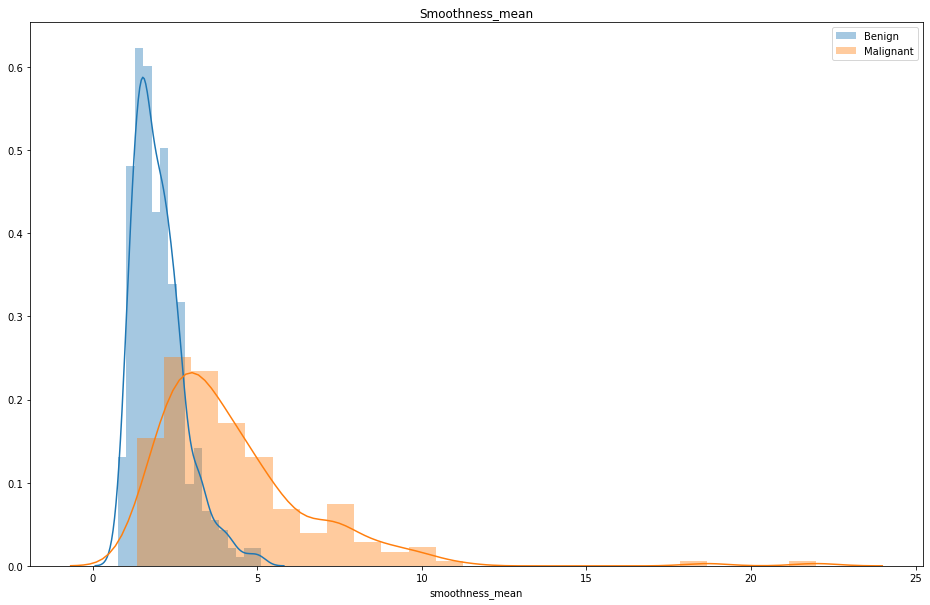

In [13]:
fig = plt.figure(figsize=(16,10))

sns.distplot(df[df["diagnosis"]=='B']["smoothness_mean"], label = "Benign")
sns.distplot(df[df["diagnosis"]=='M']["smoothness_mean"], label = "Malignant")
plt.title("Smoothness_mean", size = 12)
plt.legend()
plt.show();

Malignant tumors are far more skewed than benign tumors.

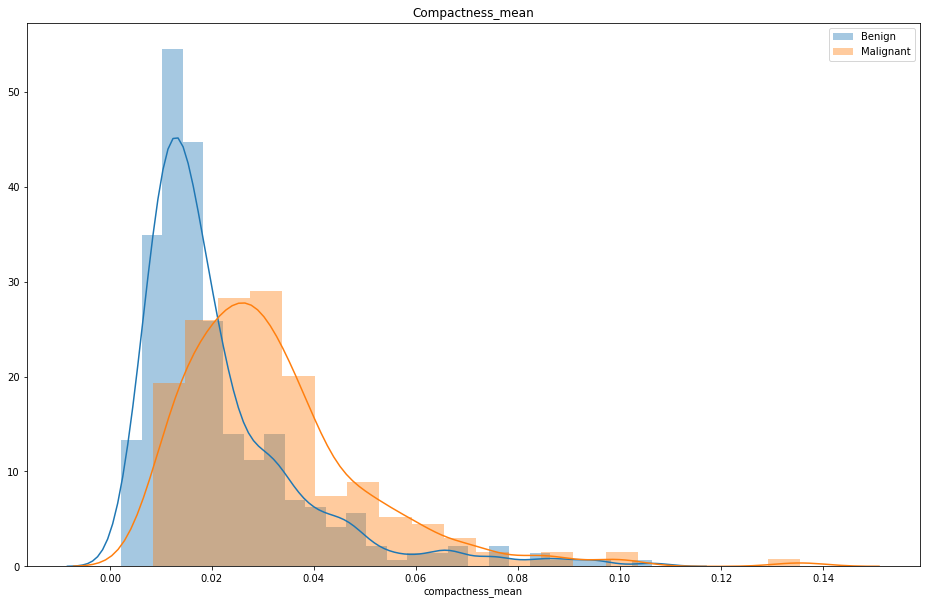

In [14]:
fig = plt.figure(figsize=(16,10))

sns.distplot(df[df["diagnosis"]=='B']["compactness_mean"], label = "Benign")
sns.distplot(df[df["diagnosis"]=='M']["compactness_mean"], label = "Malignant")
plt.title("Compactness_mean")
plt.legend()
plt.show();

Similar to previous distribution where malignant tumors have more skew. 

Malignant tumors appear to have higher mean, median, and variance than benign tumors.

---

## Bootstrap Samples

In [17]:
# Write a function to generate bootstrap samples of the data
def bootstrap_sample(df,sample_size):
    '''
    Function returns a bootstrapped sample of the data frame.
    
    sample_size should be a float between 0 and 1.
    '''
    bootstrap_sample = df.sample(frac = sample_size, replace = True)
    
    return(bootstrap_sample)

In [18]:
boot_samp = bootstrap_sample(df, 0.2)
boot_samp.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
279,8911834,B,13.850,15.18,88.99,587.4,0.09516,0.07688,0.04479,0.03711,...,14.98,21.74,98.37,670.0,0.1185,0.1724,0.1456,0.09993,0.2955,0.06912
155,8711003,B,12.250,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.02331,...,13.59,25.22,86.60,564.2,0.1217,0.1788,0.1943,0.08211,0.3113,0.08132
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
459,9112712,B,9.755,28.20,61.68,290.9,0.07984,0.04626,0.01541,0.01043,...,10.67,36.92,68.03,349.9,0.1110,0.1109,0.0719,0.04866,0.2321,0.07211
435,908489,M,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,...,17.04,30.80,113.90,869.3,0.1613,0.3568,0.4069,0.18270,0.3179,0.10550


---
## Exploratory Data Analysis

A tumor being 'benign' indicates that the cancer is not harmful, where 'malignant' indicates virulent/infectious. In simpler terms, benign means inactive, malignant means active. The diagnosis column can be transformed to a dummy variable where 1 means malignant and 0 means benign. 

In [19]:
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

Successfully transformed to a dummy variable.

Diagnosis will be the target variable so it will be dropped from the df and the other features will be used for EDA.

In [20]:
X = df.drop(['ID', 'diagnosis'], axis = 1)
y = df['diagnosis']

In [21]:
X.head()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

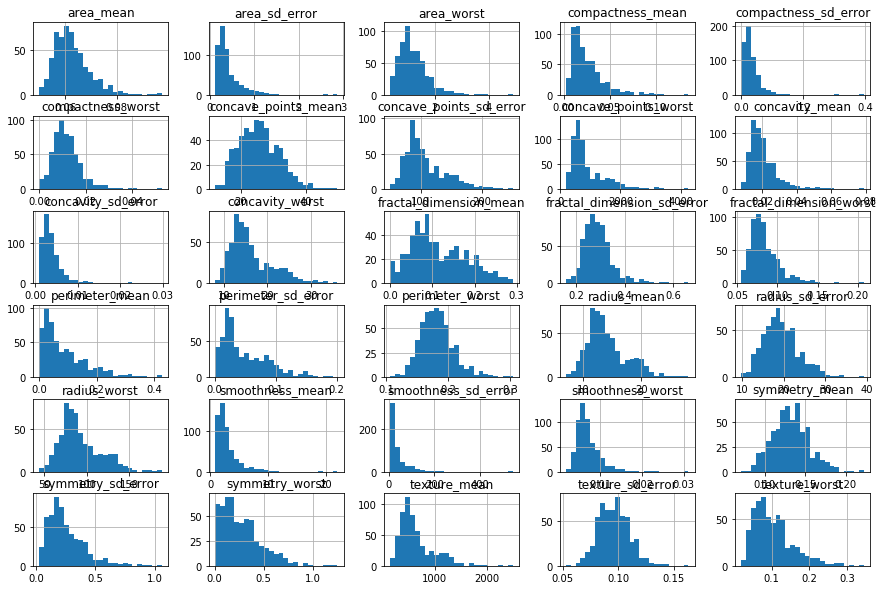

In [23]:
# histogram of different features to see distributions
X.hist(bins = 25, figsize = (15, 10))
plt.show();

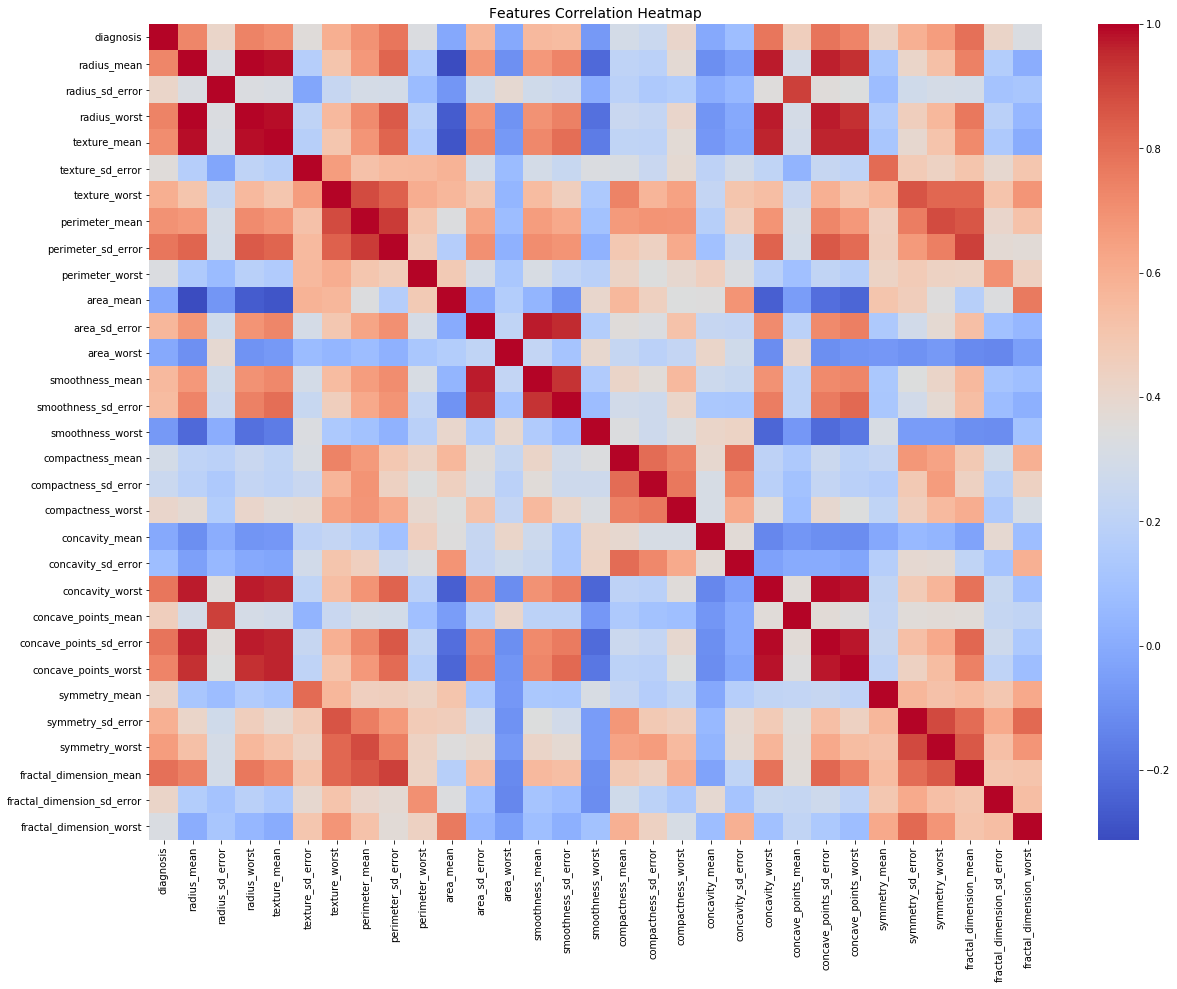

In [25]:
# Heatmap to show various correlations. Seaborn has a great one.
fig = plt.figure(figsize = (20, 15))
sns.heatmap(df.drop('ID', axis = 1).corr(), cmap = 'coolwarm')
plt.title("Features Correlation Heatmap", size = 14)
plt.show();

Obviously some features are more correlated than others. Further investigation can show which features are highly correlated with target variable, diagnosis.

In [26]:
important_feats = df.drop('ID', axis = 1).corr()['diagnosis'].sort_values(ascending = False).head(10)
important_feats = round(important_feats, 3)

important_feats

diagnosis                  1.000
fractal_dimension_mean     0.794
concave_points_sd_error    0.783
perimeter_sd_error         0.777
concavity_worst            0.776
radius_worst               0.743
concave_points_worst       0.734
radius_mean                0.730
texture_mean               0.709
perimeter_mean             0.696
Name: diagnosis, dtype: float64

In [27]:
# Take important_feats and creating a new dataframe
df_if = df[important_feats.index]

df_if.head()

,diagnosis,fractal_dimension_mean,concave_points_sd_error,perimeter_sd_error,concavity_worst,radius_worst,concave_points_worst,radius_mean,texture_mean,perimeter_mean
0,1,0.2654,184.60,0.14710,25.38,122.80,2019.0,17.99,1001.0,0.3001
1,1,0.1860,158.80,0.07017,24.99,132.90,1956.0,20.57,1326.0,0.0869
2,1,0.2430,152.50,0.12790,23.57,130.00,1709.0,19.69,1203.0,0.1974
3,1,0.2575,98.87,0.10520,14.91,77.58,567.7,11.42,386.1,0.2414
4,1,0.1625,152.20,0.10430,22.54,135.10,1575.0,20.29,1297.0,0.1980


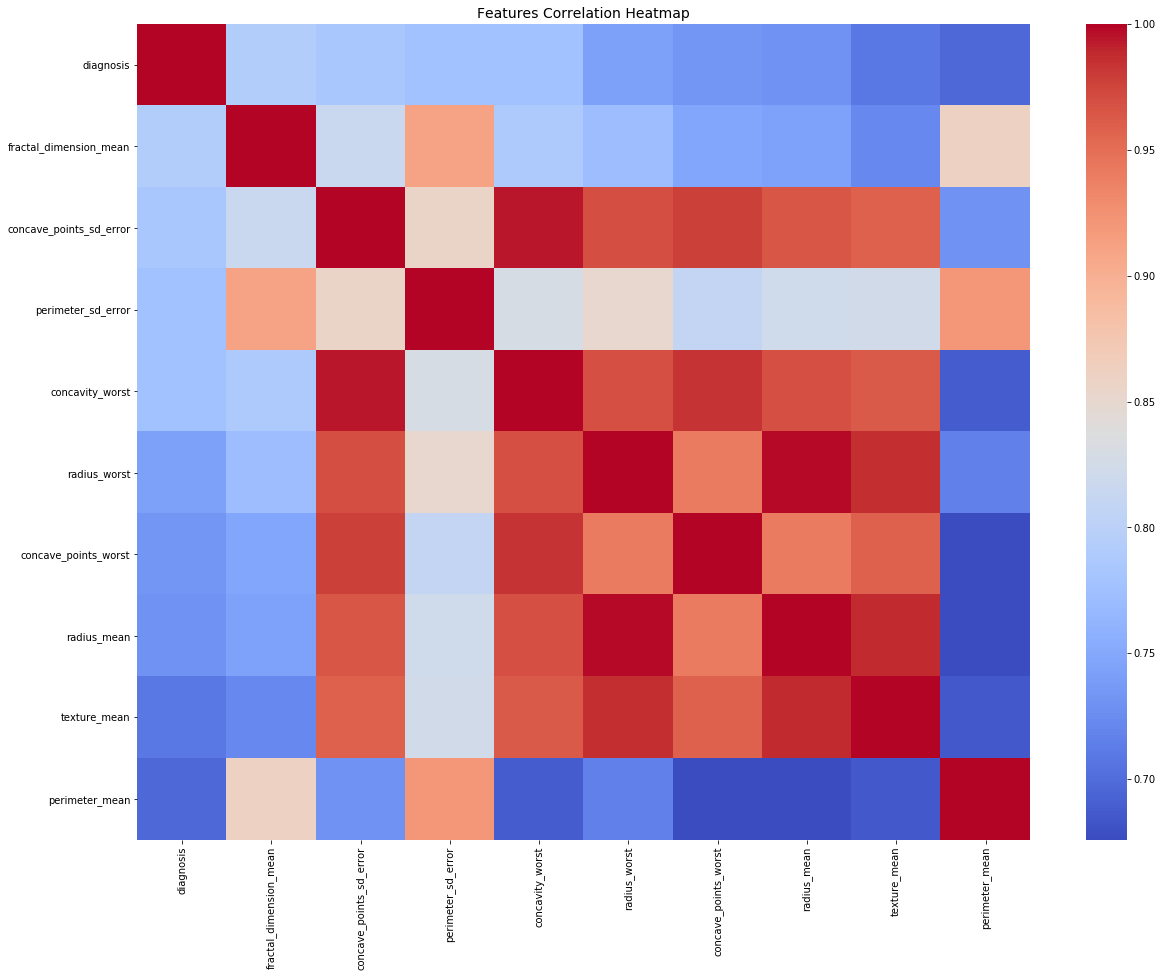

In [28]:
# Another heatmap
fig = plt.figure(figsize = (20, 15))
sns.heatmap(df_if.corr(), cmap = 'coolwarm')
plt.title("Features Correlation Heatmap", size = 14)
plt.show();


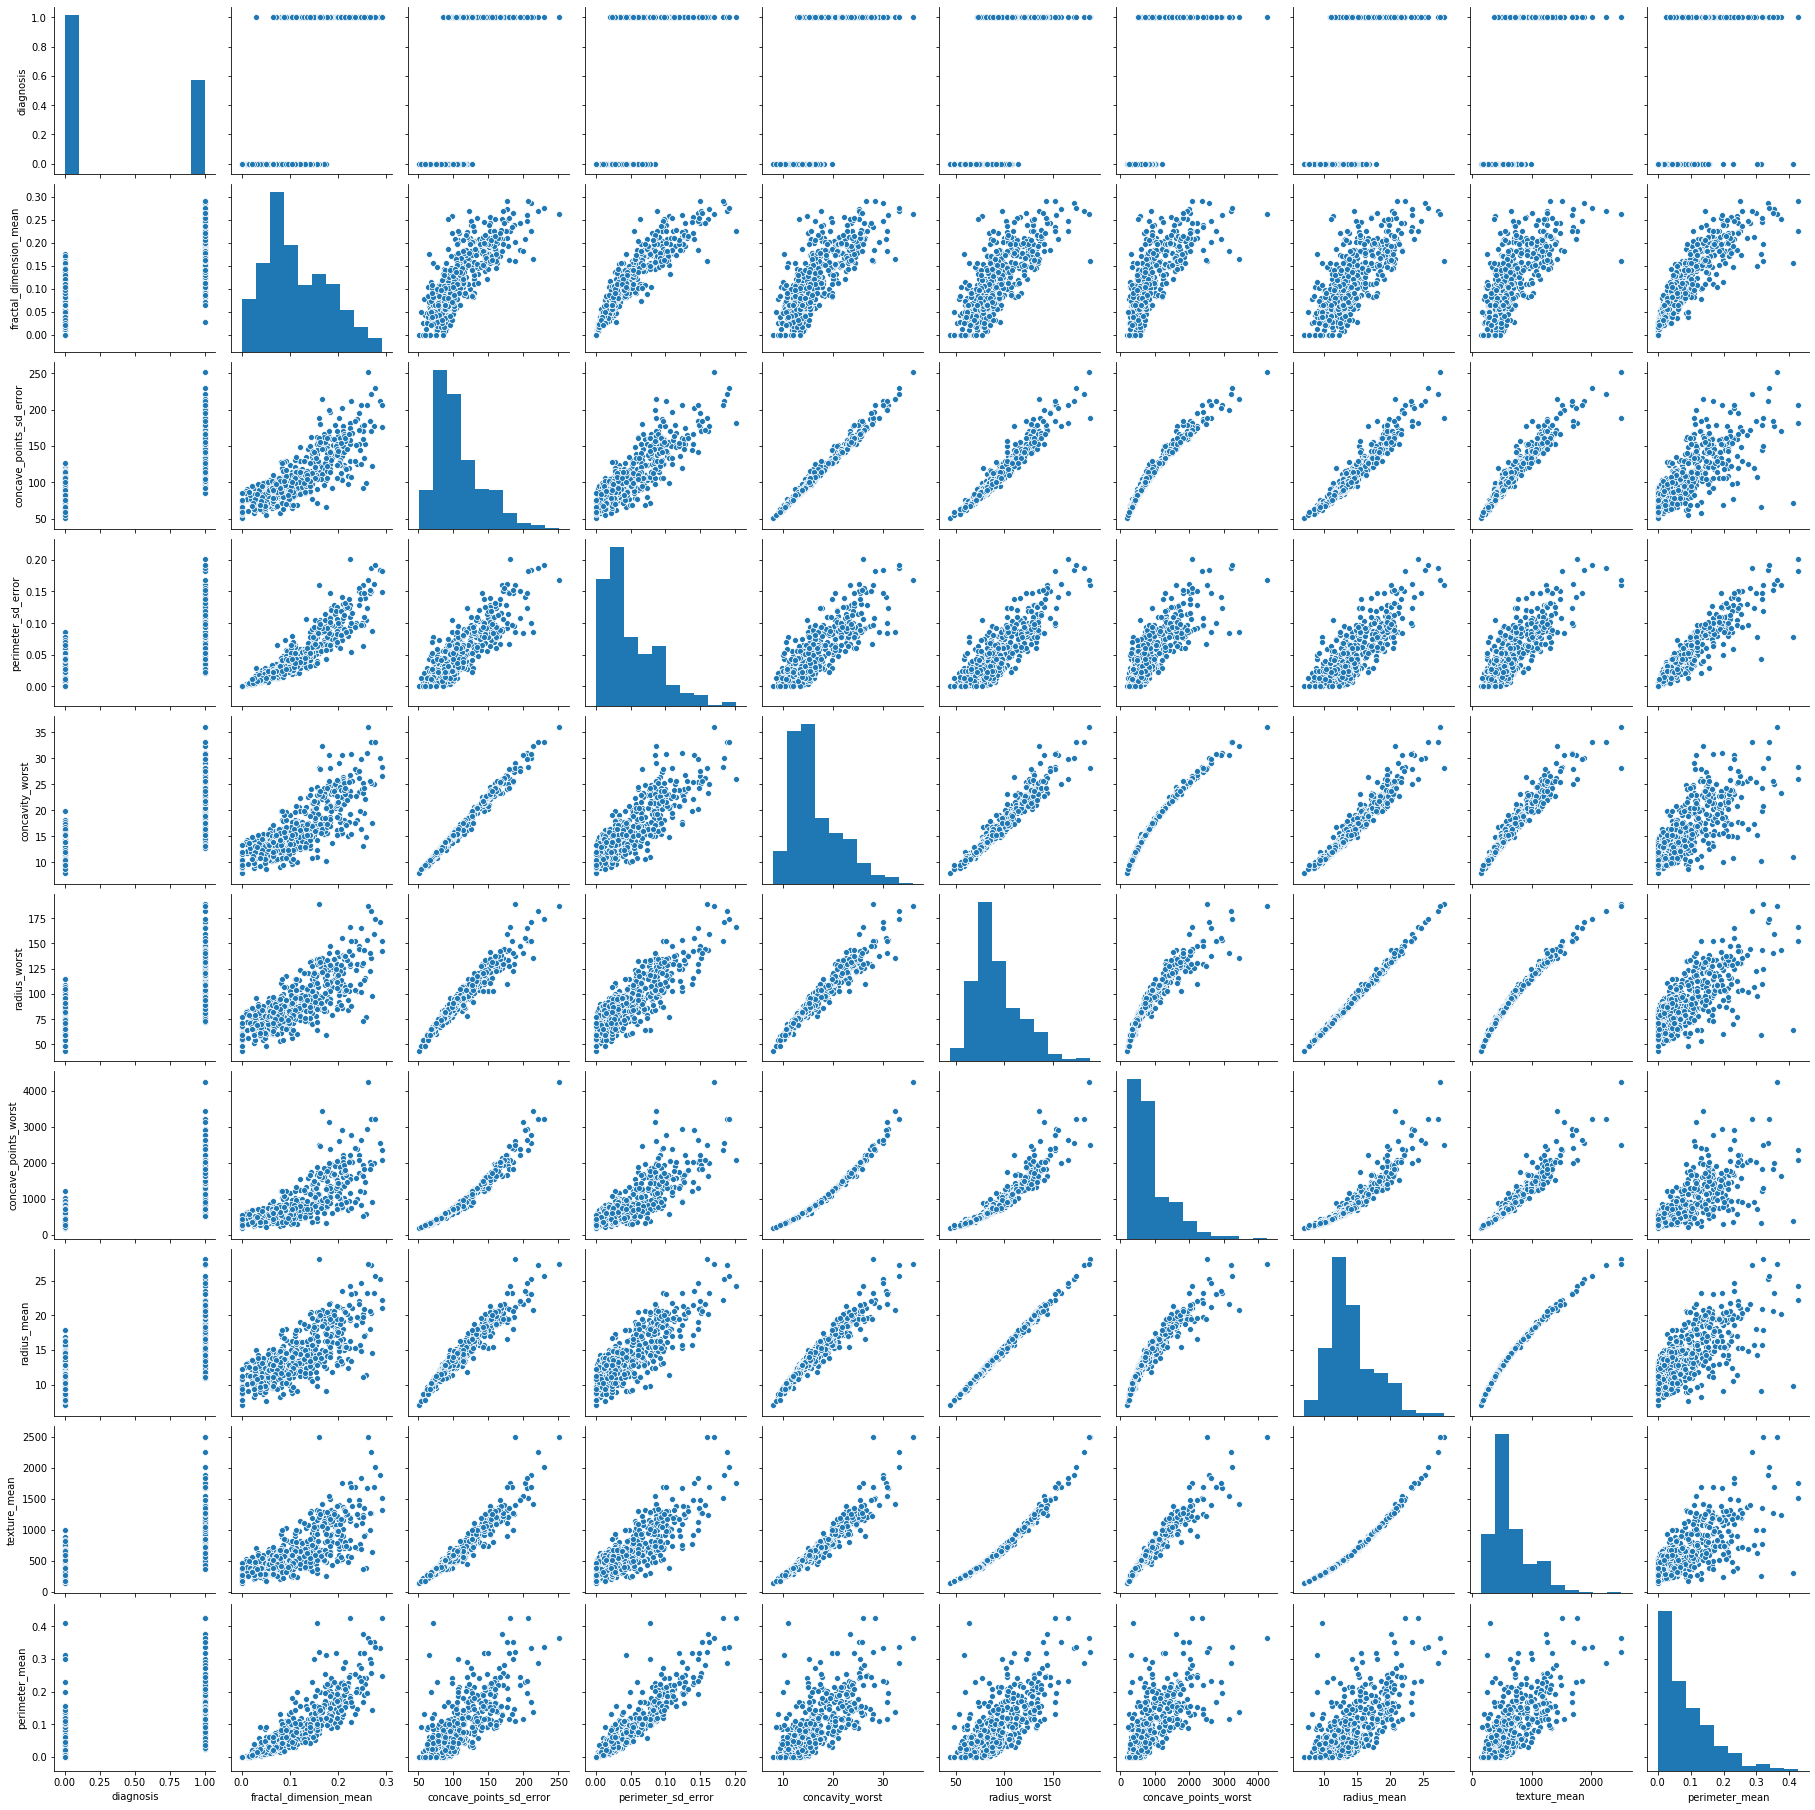

In [29]:
# Now looking at a pairplot

sns.pairplot(df_if)

In [30]:
# Creating a correlation matrix of most important features
corr_matrix = df_if.drop('diagnosis', axis = 1).corr()

In [31]:
higher = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))
threshold = 0.95
higher[higher > threshold]

,fractal_dimension_mean,concave_points_sd_error,perimeter_sd_error,concavity_worst,radius_worst,concave_points_worst,radius_mean,texture_mean,perimeter_mean
fractal_dimension_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
concave_points_sd_error,NaN,NaN,NaN,0.993708,0.970387,0.977578,0.965137,0.959120,NaN
perimeter_sd_error,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
concavity_worst,NaN,NaN,NaN,NaN,0.969476,0.984015,0.969539,0.962746,NaN
radius_worst,NaN,NaN,NaN,NaN,NaN,NaN,0.997855,0.986507,NaN
concave_points_worst,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959213,NaN
radius_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.987357,NaN
texture_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
perimeter_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
imp_corr_features = [x for x in higher.columns if any(higher[x] >= threshold)]

In [34]:
imp_corr_features

['concavity_worst',
 'radius_worst',
 'concave_points_worst',
 'radius_mean',
 'texture_mean']

The highest correlated features of the dataset are concavity_worst, radius_worst, concave_points_worst, radius_mean, and texture_mean.

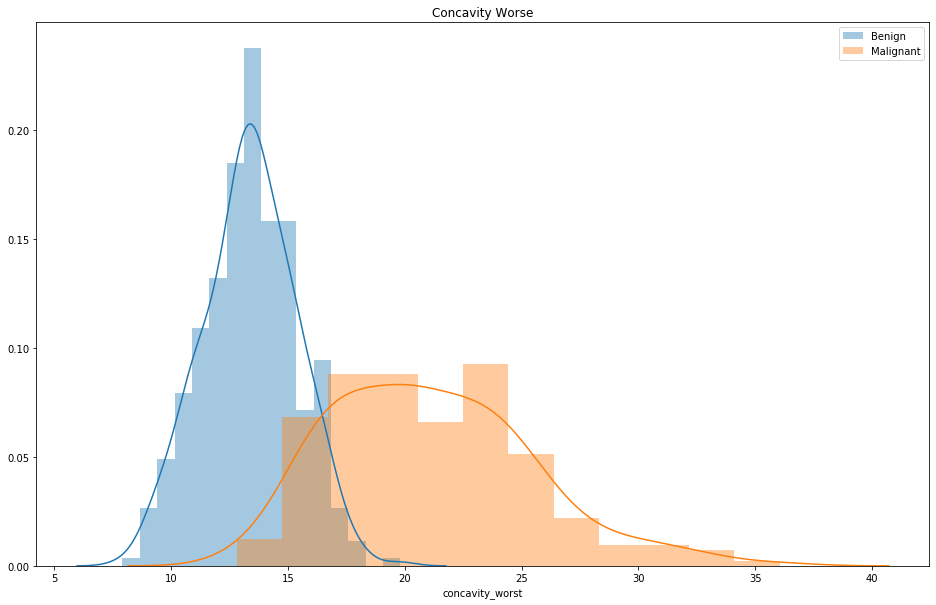

In [35]:
fig = plt.figure(figsize=(16,10))

sns.distplot(df[df["diagnosis"]==0]["concavity_worst"], label = "Benign")
sns.distplot(df[df["diagnosis"]==1]["concavity_worst"], label = "Malignant")
plt.title("Concavity Worse", size = 12)
plt.legend()
plt.show();

Above you can see the concavity worst feature is very different for melignant than benign tumors. Malignant tumors have higher mean, median, and variance.

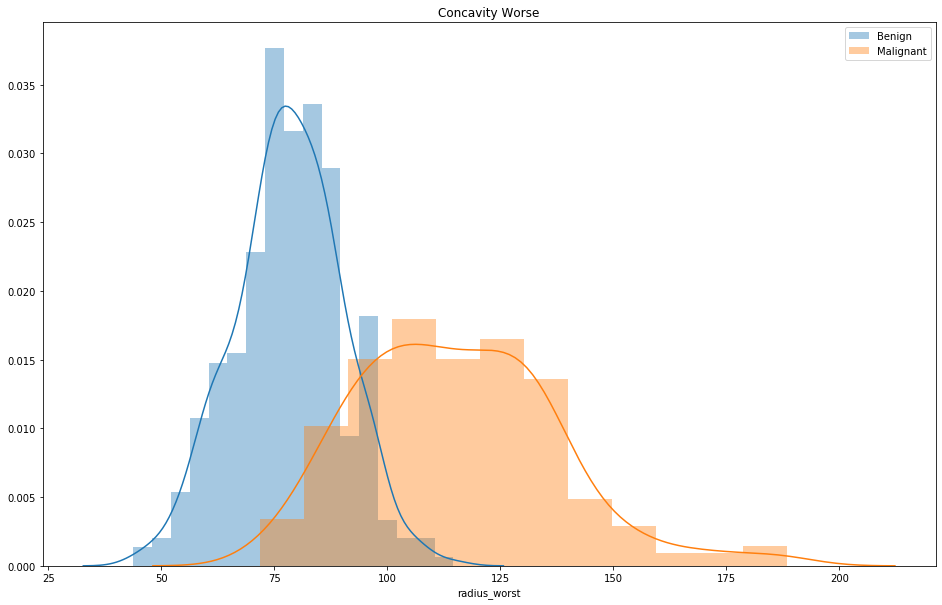

In [36]:
fig = plt.figure(figsize=(16,10))

sns.distplot(df[df["diagnosis"]==0]["radius_worst"], label = "Benign")
sns.distplot(df[df["diagnosis"]==1]["radius_worst"], label = "Malignant")
plt.title("Concavity Worse", size = 12)
plt.legend()
plt.show();

Similar to the concavity_worst feature. Malignant tumors have higher mean, median, and variance

___
## Modeling

In [38]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


____
### First Model: Decision Tree

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [41]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(426, 30) (426,)
(143, 30) (143,)


In [43]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
y_pred = dtc.predict(X_test)

In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        89
           1       0.93      0.94      0.94        54

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



Overall, solid model for a realtively simple one.

In [81]:
dtc_feat_imps = dtc.feature_importances_
feature_list = list(X_train.columns)

dtc_feature_importances = [
    (feature, round(importance, 2)) for feature, importance in zip(feature_list, dtc_feat_imps)
]

In [82]:
dtc_feature_importances = sorted(dtc_feature_importances, key= lambda x: x[1], reverse=True)


dtc_feature_importances

[('perimeter_sd_error', 0.7),
 ('concave_points_mean', 0.11),
 ('concavity_worst', 0.06),
 ('concave_points_worst', 0.06),
 ('radius_sd_error', 0.03),
 ('compactness_worst', 0.02),
 ('area_sd_error', 0.01),
 ('compactness_mean', 0.01),
 ('symmetry_mean', 0.01),
 ('radius_mean', 0.0),
 ('radius_worst', 0.0),
 ('texture_mean', 0.0),
 ('texture_sd_error', 0.0),
 ('texture_worst', 0.0),
 ('perimeter_mean', 0.0),
 ('perimeter_worst', 0.0),
 ('area_mean', 0.0),
 ('area_worst', 0.0),
 ('smoothness_mean', 0.0),
 ('smoothness_sd_error', 0.0),
 ('smoothness_worst', 0.0),
 ('compactness_sd_error', 0.0),
 ('concavity_mean', 0.0),
 ('concavity_sd_error', 0.0),
 ('concave_points_sd_error', 0.0),
 ('symmetry_sd_error', 0.0),
 ('symmetry_worst', 0.0),
 ('fractal_dimension_mean', 0.0),
 ('fractal_dimension_sd_error', 0.0),
 ('fractal_dimension_worst', 0.0)]

___

### Second Model: Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
# Doing another train test split as a sanity check
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(426, 30) (426,)
(143, 30) (143,)


In [61]:
rfc = RandomForestClassifier(n_estimators = 100,
                            bootstrap = True,
                            min_samples_leaf = 10,
                            max_features = 'sqrt')

In [62]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
y_pred = rfc.predict(X_test)

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        89
           1       0.96      0.94      0.95        54

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [68]:
rfc_feat_imps = rfc.feature_importances_
feature_list = list(X_train.columns)

rfc_feature_importances = [
    (feature, round(importance, 2)) for feature, importance in zip(feature_list, rfc_feat_imps)
]

In [72]:
rfc_feature_importances = sorted(rfc_feature_importances, key= lambda x: x[1], reverse=True)


rfc_feature_importances

[('fractal_dimension_mean', 0.15),
 ('concave_points_sd_error', 0.13),
 ('perimeter_sd_error', 0.11),
 ('concave_points_worst', 0.1),
 ('concavity_worst', 0.08),
 ('perimeter_mean', 0.07),
 ('radius_mean', 0.06),
 ('symmetry_worst', 0.06),
 ('texture_mean', 0.05),
 ('smoothness_sd_error', 0.05),
 ('radius_worst', 0.03),
 ('smoothness_mean', 0.02),
 ('radius_sd_error', 0.01),
 ('texture_worst', 0.01),
 ('area_sd_error', 0.01),
 ('compactness_sd_error', 0.01),
 ('concave_points_mean', 0.01),
 ('symmetry_sd_error', 0.01),
 ('fractal_dimension_sd_error', 0.01),
 ('fractal_dimension_worst', 0.01),
 ('texture_sd_error', 0.0),
 ('perimeter_worst', 0.0),
 ('area_mean', 0.0),
 ('area_worst', 0.0),
 ('smoothness_worst', 0.0),
 ('compactness_mean', 0.0),
 ('compactness_worst', 0.0),
 ('concavity_mean', 0.0),
 ('concavity_sd_error', 0.0),
 ('symmetry_mean', 0.0)]

---

## Third Model: Gradient Boosting Classifier

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(426, 30) (426,)
(143, 30) (143,)


In [77]:
gbc = GradientBoostingClassifier(n_estimators = 100,
                                learning_rate = 0.1)

gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        89
           1       0.94      0.94      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [80]:
gbc_feat_imps = gbc.feature_importances_
feature_list = list(X_train.columns)

gbc_feature_importances = [
    (feature, round(importance, 2)) for feature, importance in zip(feature_list, gbc_feat_imps)
]

In [83]:
gbc_feature_importances = sorted(gbc_feature_importances, key= lambda x: x[1], reverse=True)


gbc_feature_importances

[('perimeter_sd_error', 0.47),
 ('fractal_dimension_mean', 0.24),
 ('concavity_worst', 0.07),
 ('concave_points_mean', 0.05),
 ('concave_points_worst', 0.05),
 ('concave_points_sd_error', 0.03),
 ('radius_sd_error', 0.02),
 ('symmetry_worst', 0.02),
 ('area_sd_error', 0.01),
 ('area_worst', 0.01),
 ('smoothness_sd_error', 0.01),
 ('compactness_sd_error', 0.01),
 ('compactness_worst', 0.01),
 ('radius_mean', 0.0),
 ('radius_worst', 0.0),
 ('texture_mean', 0.0),
 ('texture_sd_error', 0.0),
 ('texture_worst', 0.0),
 ('perimeter_mean', 0.0),
 ('perimeter_worst', 0.0),
 ('area_mean', 0.0),
 ('smoothness_mean', 0.0),
 ('smoothness_worst', 0.0),
 ('compactness_mean', 0.0),
 ('concavity_mean', 0.0),
 ('concavity_sd_error', 0.0),
 ('symmetry_mean', 0.0),
 ('symmetry_sd_error', 0.0),
 ('fractal_dimension_sd_error', 0.0),
 ('fractal_dimension_worst', 0.0)]

The feature_importances_ attribute on models allows you to see which models weight certain features.

DTC weighed ('perimeter_sd_error', 0.7) as the most important feature.

RFC weighed ('fractal_dimension_mean', 0.15) as the most important feature.

GBC weighed ('perimeter_sd_error', 0.47) as the most important feature.

---

## Model Explanations

### Decision Tree:

The goal of a decision tree is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A decision tree can be seen as a piecewise constant approximation.

* Pros:
    
    - Simple to understand and interpret
    
    - Requires little data preparation
    
    - Can handle numerical and categorical features

* Cons:
    
    - Can create over-complex trees that do not generalize well (overfitting).
    
    - Can be unstable because small variations in the data might result in a different tree being genearated
    - Decision trees can be biased if some classes dominate so one should ensure dataset is balanced prior to fitting.

* Combatting overfitting:
    
    - This can be done with "pre-pruning" which is adjusting different parameters of the tree. Typically this is done by adjusting min_samples_leaf and max_depth.

### Random Forest:

The decision tree is the foundation of a random forest. A random forest will fit a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve accuracy and control over-fitting.

* Pros:
    
    - Good performance on unbalanced data sets.
    
    - Can handle large data with higher dimensionality
    
    - Good handling of missing data
    
    - Little impact of outliers
    
    - More generalization which leads to less overfitting

* Cons:
    
    - Features need some prediction power to work
    
    - Predictions of the trees need to be uncorrelated
    
    - Appears as a black box, meaning it can be tough to know what is happening

* Combatting overfitting:
    
    - Similar to decision trees, combatting overfitting can be done by pre-pruning the tree by adjusting certain parameters. Max_depth, num_estimators, min_samples_leaf, and min_samples_split can all be adjusted to combat overfitting.


### Gradient Boosting Classifier

Gradient Boosting Classifier is similar to Random Forest. It works by sequentially adding predictors to an ensemble, each one correcting its predecessor. Instead of tweaking the instance weights at every iteration, this method tries to fit the new predictor to the residual errors made by the previous predictor. The learning rate parameter is important in fitting the model.

* Pros:
    - Often highly accurate
    - Lots of flexibility - can optimize on different loss functions and provides several hyper parameter tuning options.
    - No data pre-processing needed
    - Handles missing data

* Cons:
    - Models will continue improving to minimize all errors which can lead to overfitting
    - Computationally expensive - require many trees
    - High flexibility resutls in many parameters that interact and influence the behavior of the approach (number of iterations, tree depth, regularization parameters)
    - Less interpretive in nature
    
* Combatting overfitting:
    - Similar to random forest except the learning rate parameter can be adjusted. Setting learning rate low will require more trees in the ensemble to fit the training set, but will usually generalize better.
    
### Model Performance

All the models performed similarly. The Random Forest slightly improved upon the Decision Tree and th Gradient Boosting Classifier performed almost as well as the Random Forest Classifier based on F1 Score.

---
## Explanation

--- 

### Technical Audiences

Tree based models were chosen since they are robust and can do well on smaller datasets. 

Limitations and Further Steps:

* No pre-pruning on the decision tree. This was chosen for speed. A lack of pre-pruning could lead to an overfit model.

* No GridSearchCV. Although there was a train_test_split, Grid Search Cross-Validation could lead to better fit models due to testing more hyper parameters

* Time. I did my best to remain within the time limit imposed on the challenge. With more time, more models could have been tested, such as a Logistic Regression, XGBoost, or ExtraTrees. 

### Non-Tecnical Audiences

The first model used was a Decision Tree. A decision tree is a flow-chart like structure where each node represent a test on a certain feature (variable) in our data set. The branch represents the outcome of that test. The model will continue testing until either all features are tested or a limit on how deep the tree will go is placed (this is part of a technique called pre-pruning). The Decision Tree performed well with high accuracy, which means it identifies malignant tumors well.

The next model used was a Random Forest. As the name implies, a Random Forest takes multiple decision trees then averages the results together. Random Forests will usually improve upon a decision tree because it is doing more tests and taking different samples of the data. The Random Forest classifier model used did slightly better than our Decision Tree.

Lastly, a Gradient Boosting Classifier was used. This is another tree based method, but slightly different than Random Forests and can be a little confusing. A Gradient Boosting Classifier will create a tree and then see how that tree performs. The next iteration will "learn" from the previous tree's errors and build a more accurate tree. The model will continue doing this until all variables are tested or you set parameters that limit how much the model will test (pre-pruning as mentioned earlier).

The top three factors that contributed to malignant tumor identification as identified by each model:

* Decision Tree:
    - ('perimeter_sd_error', 0.7)
    - ('concave_points_mean', 0.11)
    - ('concavity_worst', 0.06)
    
* Random Forest:
    - ('fractal_dimension_mean', 0.15)
    - ('concave_points_sd_error', 0.13)
    - ('perimeter_sd_error', 0.11)
    
* Gradient Boosting:
    - ('perimeter_sd_error', 0.47)
    - ('fractal_dimension_mean', 0.24)
    - ('concavity_worst', 0.07)
    
perimeter_sd_error was chosen by all three models as being highly important!

---

## Part 2. Feedback

In [1]:
part2_csv = 'https://gist.githubusercontent.com/jeff-boykin/9e1a450ef152604e6830ce70f4fc1be8/raw/4d42aebc2c2d3f7528a7769248720918e14f2e03/part-2-data.train.csv'

In [5]:
data = pd.read_csv(part2_csv)

data.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


In [6]:
data.shape

(10000, 12)

___
### Student Sample 1.

Below is the full script for Student 1. 

If there is feedback for a chunk of code it will be in a separate cell with the feedback in a markdown cell below it.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
d = pd.read_csv('../data/train.csv')


# Setup data for prediction
x1 = data.SalaryNormalized
x2 = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')
print(scores.mean())

In [ ]:
import pandas as pd
import numpy as np
from sklearn import LinearRegression
from sklearn.cross_validation import cross_val_score

You may want to hold off on importing specific modules/classes from sklearn until you're about to use them. This will help you keep track of what model you're using and not use up a bunch of memory.

Also, cross_validation isn't a class in sklearn. cross_val_score should be in the sklear.model_selection class. Sklearn has great documentation so make sure you're importing from the correct places. Don't worry about remembering all the different modules. Sklearn is a large library, so it's okay if you forget which module something is located, but be sure you know how to use the documentation. This will help you down the road.
https://scikit-learn.org/stable/index.html

In [ ]:
d = pd.read_csv('../data/train.csv')

Pick a better name for your dataframe than simply 'd'. This doesn't really tell you or whoever looks at your code what the data is reflective of and it could be mistaken as a dictionary in other parts of your code.

df is commonly used as a convention. You use 'data' later in your file which is also fine. Just be consistent and try not to use names that could be confusing or vague.

Also, it's typically a good idea to call the .head() method after importing data to see if the import went well and to get a look at the data. .info(), .shape, and .describe() are also good to call right after importing.

In [ ]:
# Setup data for prediction
x1 = data.SalaryNormalized
x2 = pd.get_dummies(data.ContractType)

Let's get some better names for your variables!

You can do data.VariableName but typically you'll see:
data['VariableName'] which is more conventional.

The typical convention is X for predictor variables and y for the target variable. 

This is derived from the notation y = f(X) which should help explain the convention. We're trying to predict y based on a function of X!

If we're assuming that you're trying to predict salary here's what your variables should look like:

y = data['SalaryNormalized']

and

X = data['ContractType']

Additionally, there are 12 features in the dataset but only two included in your data preparation. You can start with only a few predictor variables and iteratively add more each time, but it may be easier to start with all features and then drop features with less predictive power after testing the model. Also, only one predictor variable will probably give you a poor model.

You should do some imputation for values of data['ContractType']. From a quick look at the dataset, it has missing values and you should consider how you are going to take care of those missing values before converting it to a dummy variable. It only has two different values (full_time or part_time) so it may even be easier to convert it to a binary variable since .get_dummies() adds extra columns.

In [ ]:
# Setup model
model = LinearRegression()

Consider a more specific name for your model that indicates what kind of model you are using. This will help you later on if you're using different types of models and need to keep track of which models you have used.

It can be something simple like lin_reg = LinearRegression().

If you continually use model then model1 you risk confusing yourself. But if you use lin_reg, kNN, etc. then you can keep track of your models and it makes it easier to compare model performances against each other.

In [ ]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split

This is a better place to import the cross_val_score. Just make sure you're importing it from the right place! Also, cross_val_score only needs to be imported once!

train_test_split is in sklearn.model_selection. You also didn't specify a train_test_split for your model. Typically you only want to import a class or module if you're going to use it.

In [ ]:
scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')
print(scores.mean())

Firstly, this ties back to why you need to have better names for your variables. It's not clear which one is the target and it could be in the wrong spot in the call of cross_val_score.

cros_val_score should be set up as:

scores = cross_val_score(model, predictor, target, cv = 3 #just make sure more than 1)

cv = 1. You should use a larger number on this. In most common cross-validation approaches you use part of the training set for testing. You do this several times so that each data point appears once in the test set. By setting this equal to 1, you're essentially using the entire dataset without splitting the dataset and sampling different subsets. This won't help train the model. You should set cv to at least 2, but I have seen 3 or 5 usually used. 
Here's a link to read up more on cross-validation if you're struggling to grasp it.

https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

Calling scores.mean() will give you the mean score of all iterations. Consider calling scores by itself to see the scores across the different cv folds in addition to calling just the mean.

'Mean_absolute_error' is a good metric for seeing how a regression model performs so that should be okay!

Even though you didn't use train_test_split, here's how you can use train_test_split to set up and fit the data to your model.

In [ ]:
# Suggested code for fitting and training the model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# creating X and y
X = df['predictor_variables']
y = df['target']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

# Initialize the model
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

# See how model performs
from sklearn.metrics import mean_squared_error, r2_score
print("Training Score: {:.3f}".format(lin_reg.score(X_train, y_train)))
print("Test Score: {:.3f}".format(lin_reg.score(X_test, y_test)))
print("Coefficients: {:.3f}".format(lin_reg.coef_))
print("MSE: {:.3f}".format(mean_squared_error(y_test, y_pred)))
print("R2 Score: {:.3f}".format(r2_score(y_test, y_pred)))

---

### Student Sample 2.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
data = pd.read_csv('../data/train.csv')


# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
print(scores.mean())

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

I believe .cross_validation isn't a module in sklearn. It should be in sklearn.model_selection. 

Don't feel bad about this stuff. It's very common to forget all the different modules in sklearn. The documentation for sklearn is very good and helpful!

https://scikit-learn.org/stable/index.html

In [ ]:
data = pd.read_csv('../data/train.csv')

After importing data, consider calling .head() on your data frame to get a quick look. This will help you ensure the data was imported correctly. 
.shape, .info(), and .describe() can also provide some good insight into what the data looks like.

In [ ]:
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

data.SalaryNormalized is perfectly valid but it's usually preferred to use
data['SalaryNormalize']. It makes it clearer that you're using a variable and not calling an attribute or method on your data frame.

There appears to be more features in the data set than you've included in X. You may want to consider adding in all features initially then removing features that have little to no predictive power. By only including one variable your model may not have strong predictive power.

You should do some imputation for values of data['ContractType']. From a quick look at the dataset, it has missing values and you should consider how you are going to take care of those missing values before converting it to a dummy variable. It only has two different values (full_time or part_time) so it may even be easier to convert it to a binary variable since .get_dummies() adds extra columns.

In [ ]:
model = LinearRegression()

This is more of a personal preference, but you may want to be more specific with the name for your model in case you try multiple models or variations of the same model. 

I typically use an abbreviation of the model I'm using such as:

lin_reg = LinearRegression()

This can be helpful if you use many different models and need to compare their results.

In [ ]:
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
print(scores.mean())

Setting CV = 5 is a good job. This will make sure the model sees all data points in the training and test sets. Mean Absolute Error is a good metric for evaluating a regression as well.

By printing the scores.mean() you should get a good idea how the model is performing. It may be helpful to print(scores) to see how it model performed across different folds.

If it's performing poorly you may want to consider adding more features, using a different type of model, and/or doing a train_test_split instead of just CV. 

You could even do a GridSearchCV, but it will take a long time to run. 

Good work, hopefully you have a good model!.